In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# MODELS
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Creating X and Y


In [5]:
x = df.drop(columns = "math_score",axis = 1)
y = df["math_score"]

In [6]:
## Creating column transformation
oh_f = x.select_dtypes(include = "object").columns
scaler_f = x.select_dtypes(exclude = "object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

onehot = OneHotEncoder()
scaler = StandardScaler()

transformer = ColumnTransformer([
    ("Onehotencoder",onehot,oh_f),
    ("Standardscaler",scaler,scaler_f)
    ],remainder = "passthrough"
)

In [7]:
x = transformer.fit_transform(x)

In [8]:
x.shape

(1000, 19)

In [9]:
## Train Test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
r2_score, mean_absolute_error, mean_squared_error

def evaluation(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    r2squared = r2_score(true,predicted)
    return mae,rmse,mse,r2squared


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [36]:
model_list = []
r2_list = []
i = 0
for model in models.values():
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae,rmse,mse,r2squared = evaluation(y_test,y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("R2 score: ",r2squared)
    print("Model score on test data")
    print("mean_squared_error: ",mse)
    print("root_mean_squared_error: ",rmse)
    print("mean_absolute_error: ",mae)
    
    r2_list.append(r2squared)

    i = i+1
    print("\n")
    

Linear Regression
R2 score:  0.8758651707860425
Model score on test data
mean_squared_error:  26.19089727877984
root_mean_squared_error:  5.117704297708088
mean_absolute_error:  4.0775722911926655


Lasso
R2 score:  0.7924145518877286
Model score on test data
mean_squared_error:  43.797934733587866
root_mean_squared_error:  6.618000810938894
mean_absolute_error:  5.1654424468806


Ridge
R2 score:  0.8757639743522891
Model score on test data
mean_squared_error:  26.212248461346398
root_mean_squared_error:  5.11978988449198
mean_absolute_error:  4.080774699889134


K-Neighbors Regressor
R2 score:  0.779629598909888
Model score on test data
mean_squared_error:  46.4954
root_mean_squared_error:  6.8187535517864255
mean_absolute_error:  5.295


Decision Tree
R2 score:  0.6964749096510456
Model score on test data
mean_squared_error:  64.04
root_mean_squared_error:  8.002499609497024
mean_absolute_error:  6.24


Random Forest Regressor
R2 score:  0.8411383599757054
Model score on test data
me

In [49]:
df1 = pd.DataFrame(zip(model_list,r2_list),columns = ["Model name","R2_Score"]).sort_values(by = ["R2_Score"],ascending = False)
df1

,Model name,R2_Score
0,Linear Regression,0.875865
2,Ridge,0.875764
7,CatBoosting Regressor,0.844515
5,Random Forest Regressor,0.841138
6,XGBRegressor,0.810153
8,AdaBoost Regressor,0.799686
1,Lasso,0.792415
3,K-Neighbors Regressor,0.779630
4,Decision Tree,0.696475


## Plotting the Linear Regression model

In [44]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

<Axes: xlabel='math_score'>

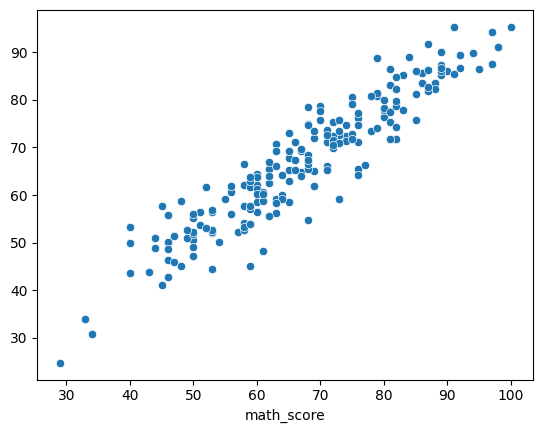

In [45]:
sns.scatterplot(x = y_test,y = y_pred)

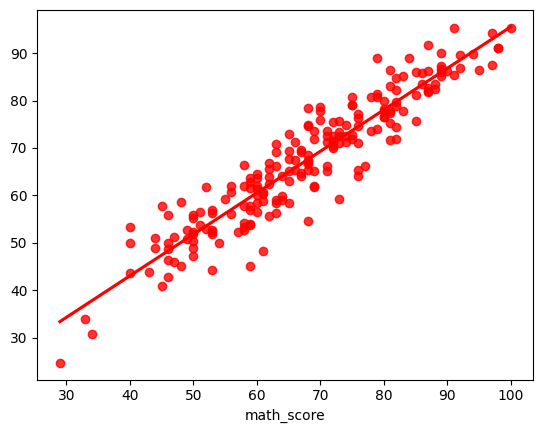

In [46]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [47]:
pred_df = pd.DataFrame({"Actual Value":y_test,"Predicted_Value" : y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted_Value,Difference
924,74,72.451245,1.548755
166,53,51.973840,1.026160
654,73,72.560002,0.439998
65,67,69.199711,-2.199711
526,56,60.735515,-4.735515
...,...,...,...
917,44,48.845071,-4.845071
100,79,74.078988,4.921012
809,59,57.692997,1.307003
323,43,43.881111,-0.881111
